# ベイズ推定

## 用語

### 分布に関するベイズの定理
- 事前確率分布 prior probability distribution
- 事後確率分布 posterior probability distribution
- カーネル kernel
- 正規化定数 normalizing constant
- 正規化係数 normalizing coefficient
- 自然共役事前分布natural conjugate prior distribution

### 事後分布の評価
- 点推定 point estimation
- 事後期待値 expected a posteriori, EAP
- 事後確率最大値 maximum a posteriori, MAP
- 事後中央値 posterior median, MED
- 標準誤差 standard error
- 事後分散 posterior variance
- 事後標準偏差 posterior standard deviation
- 区間推定 interval estimation
- 信頼区間 confidence interval
- 確信区間 credible interval
- 信頼係数 confidence coefficient

### 無情報的事前分布
- 無情報敵事前分布 non-information prior distribution
  - 漠然とした事前分布 vague prior distribution
- 事前分布　vague prior distribution
- 局所一様事前分布

### いくつかの重要な分布
- ポアソン分布　Poisson distribution
- 指数分布　exponential distribution
- ガンマ分布　gamma distribution

### 予測分布
- 予測分布　preditive distribution
- 条件付き予測分布　conditional predictive distribution
- 事後予測分布　posterior predictive distribution


In [1]:
using Distributions
using Plots

---
# ノート

## 分布に関するベイズの定理
乗法定理でどちらを$\theta$、どちらを$x$とみなすかによって書き換える。

$$ f(\theta, x) = f(x|\theta)f(\theta) $$
$$ f(\theta, x) = f(\theta|x)f(x) $$

伝統的な統計学では母数$\theta$は道であるが固定されており、確率変数ではない。  
ベイズ統計学では$f(\theta)$を母数の分布として導入する。  
**$f(\theta|x)$はデータによる母数の条件付き分布であり、$f(\theta, x)$は母数とデータの同時分布である。**

伝統的な統計学では上の2式を原則的には許さない。しかしベイズ統計学では上式からベイズの定理を導出する。

$$ f(\theta, x) = \frac{f(x|\theta)f(\theta)}{f(x)} $$

$f(\theta)$は事前確率分布、$f(\theta|x)$は事後確率分布、$f(x|\theta)$は尤度である。  
全確率の式より連続変数$\theta$に合わせて積分するとベイズの定理は下記のように表される。

$$ f(\theta|x) = \frac{f(x|\theta)f(\theta)}{\int^{+\infty}_{-\infty}f(x|\theta)f(\theta) d\theta}$$

2項分布の確率関数は $ f(x|\theta) = {}_n \mathrm{C}_x \theta^x(1-\theta)^{n-x}$ である。  
2項分布のカーネルは $\theta^x(1-\theta)^{n-x}$　であり、この部分が2項分布の性質を決めている。  
これを強調するために2項分布の確率分布を $f(x|\theta) \propto \theta^x(1-\theta)^{n-x}$ と表現することが有る。  

ベータ分布の確率密度関数は $ f(x|p, q) = B(p, q)^{-1}x^{p-1}(1-x)^{q-1}$ である。
$B(p, q)$はベータ関数と呼ばれ、下記のように定義される。

$$B(p, q) = \int^1_0 x^{p-1}(1-x)^{q-1} dx$$

ベータ関数は全体の積分が1になるように選ばれている。$B(p, q)$はベータ分布の正規化定数である。  
ベータ分布に限らず、正規化定数・正規化係数は確率分布の積分が1になるよう設けられた母数を含まないパートである。  
ベータ分布のカーネルは下記の通り。ここがベータ分布の性質を決めている。

$$f(x|p,q) \propto x^{p-1}(1-x)^{q-1}$$

ベイズの定理の式における正規化定数は$f(x)$である。よって尤度と事前分布の積が事後分布のカーネルである。

$$f(\theta|x) \propto f(x|\theta)f(\theta)$$

### 正選手問題
2人選手候補A,Bの中から正選手を1名だけ決める。ここ数日の戦績ではAの3勝4敗でBが優勢である。  
しかしその以前の一週間では8勝2敗でAが優勢だった。ただしこれは非公式記録であり監督の個人的印象に基づくものである。  
どちらを正選手に選ぶべきか。

伝統的な統計学ではBの勝率が4/7と推定され、Bのほうが上手いとされる。  
ベイズ統計学の私的分析では主観に基づくデータも利用する。  

事前分布を自由に決めてしまうとほとんどの場合事後分布が求まらない。（ただしこれはかつての話）  
そのため事後分布が求まるように事前分布を決めておくという手法が提案された。  
この事前分布を自然共役事前分布という。尤度ごとの共役分布を下記に示す。

尤度 | 事前分布 | 事後分布
---|---|---
ベルヌイ分布|ベータ分布|ベータ分布
2項分布|ベータ分布|ベータ分布
ポアソン分布|ガンマ分布|ガンマ分布
正規分布の平均|正規分布|正規分布
正規分布の分散|逆ガンマ分布|逆ガンマ分布

ただし事後分布が計算可能になるように事前情報や事前信念を決めるというのは本末転倒である。  
このため共役事前分布は私的分析に利用されている。今回の問題は私的分析で問題ないため利用する。

## 事後分布の評価
8勝2敗の事前分布をベータ分布で近似すると標本比率の標本分布は$E[X]=0.8, V[X]=0.016$と推定される。  
上表より事前分布がベータ分布であるとき、ベルヌイ分布2・項分布の尤度とベータ分布の事後分布を得る。  
事後分布であるベータ分布のカーネルを求めると下記の通り。（ただし$p'=x+p,\, q'=n-x+q$）

\begin{align}
f(\theta\,|x) &\propto f(x\,|\theta)\,f(\theta) \\
              &\propto \theta^{\,x} (1-\theta)^{n-x} \times \theta^{\,p-1} (1-\theta)^{q-1}
              = \theta^{\,p'-1}(1-\theta)^{q'-1}
\end{align}

以上より事前分布と事後分布のベータ分布の母数は、 $p = 7.2, \, q=1.8$ と $p'=10.2\,(=3+7.2), \, q'=5.8\,(=7-3+1.8)$　である。


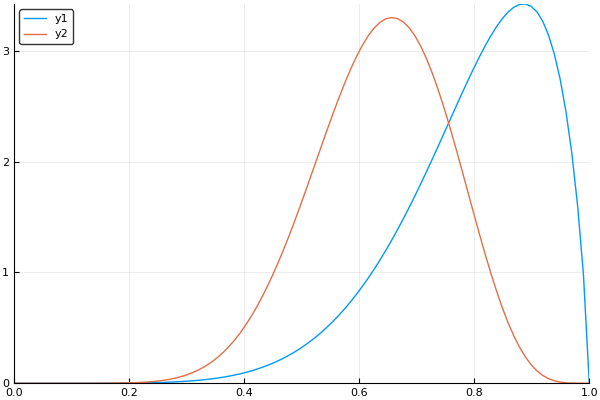

In [2]:
x = linspace(0, 1, 100)
A, B = Beta(7.2, 1.8), Beta(10.2, 5.8)
plot(x, [pdf.(A, x) pdf.(B, x)])

青からオレンジへの分布の遷移によって正式な試合によりAの勝率の評価が下がったことがわかる。  
すべてのベイズ推定は事後分布を用いる。  
特定の値で母数を評価する方法を点推定といい、伝統的な統計学において最尤推定料は点推定の1つである。  
ベイズ推定では事後期待値（EAP）、事後確率最大値（MAP）、事後中央値（MED）の3つの点推定を利用する。


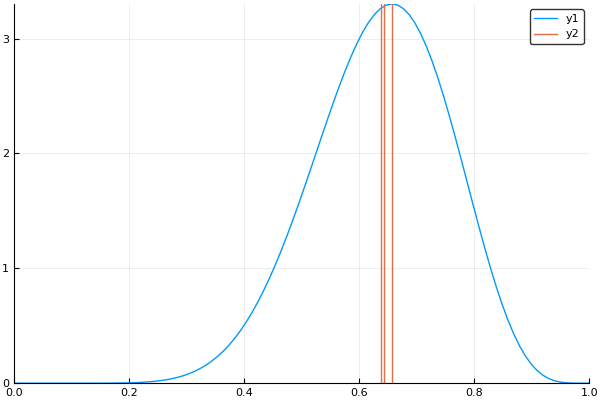

In [15]:
eap, map, med = mean(B), mode(B), median(B)
plot(x, pdf.(B, x))
vline!([eap, map, med])

EAP, MAP, MEDのどれを利用しても勝率は0.5を超え、選手Aのほうが上手いと判定される。

伝統的な統計学における標準誤差に相当するベイズ統計学の指標として事後分散と事後標準偏差がある。  

In [45]:
@printf "事前分布: 分散%5.4f, 標準偏差%5.4f\n" var(A) std(A)
@printf "事後分布: 分散%5.4f, 標準偏差%5.4f\n" var(B) std(B)

事前分布: 分散0.0160, 標準偏差0.1265
事後分布: 分散0.0136, 標準偏差0.1166


確率変数として分布する母数がEAP周辺でどれほど散らばっているかの指標が事後分布と事後標準偏差である。

特定の値で母数を評価する点推定に対し、幅を持たせて母数の評価を行う方法を区間推定という。  
伝統的な統計学に置ける区間推定は信頼区間を用いる。ベイズ推定に置ける区間推定は確信区間を用いる。  
両者の違いをはっきりと意識しておく必要がある。

信頼区間は「指定した確率で母数を含む区間」ではない。  
伝統的な統計学では母数は未知の**定数**であるため、ある区間を指定した時その区間に含まれる確率は1か0である。  
「毎回の分析で95％信頼区間を計算したとすると、それらの信頼区間のうち95％が母数を含んでいる」という意味である。

確信区間の解釈は明瞭で、確率変数である母数が具体的な区間に含まれる確率95％だと解釈する。

## 無情報的事前分布

### 治療法問題
治療法Aを病気$\alpha$の患者7人に施し、経過観察したところ3人が治癒し4人が治癒しなかった。  
しかし治療法Aによってこれまで10人中8人が治癒している。ただしこれは正式記録ではなく個人的印象にすぎない。  
治療法Aのの治癒率を評価せよ。

この問題は正選手問題と同型であるが、同様にして自然共益事前分布を利用して解くわけにはいかない。  
公的分析に恣意的・主観的な事前分布を利用することは許されないため。

これに対してベイズ統計学は事後分布にできるだけ影響を与えない事前分布、無情報的事前分布の利用を提案した。  
尤度が2項分布である場合の無情報的事前分布の第1選択肢として一様分布が挙げられる。  
ただし、一様分布に対しても批判がある。この批判に対し局所市用事前分布が提案された。が、これも恣意的な分布である。

### 入社試験問題
ある企業の入社試験は毎年同じ難しさの問題を7問出題する。  
X大学のxさんは3問正解、4問不正解。正解率を$\theta_x$とする。  
Y大学のyさんは4問正解、3問不正解。正解率を$\theta_y$とする。  
これまでの受験者からX大学の受験者の正解率は平均0.8, 分散0.04のベータ分布で近似され、  
Y大学の受験者の正解率は平均0.8, 分散0.04のベータ分布で近似されることがわかっている。  
$\theta_x$と$\theta_y$を推定し、受験者を1人だけ入社させるとしたらxさんとyさんのどちらか。

事前分布を使わずに尤度だけを利用すると $\theta_x=3/7$, $\theta_y=4/7$でありyが入社することとなる。  
事前分布として一様分布を採用し、ベイズ推定しても同じ結果になる。  
実際にベイズ推定をすると$\theta_x\gt\theta_y$となり、ｘを入社させることになる。  
**(私的分析についての考察の章)**

## いくつかの重要な分布

### レポート問題
ある授業ではレポートが課される。10分間の執筆時間後は書き上げた人から退出して良い。  
提出時における10秒あたりの平均提出者数は0.8人。学生が50人いるとき、適切な執筆時間は何分か。

2項分布の試行数$n$が大きくなり、成功確率$\theta$が小さくなる場合を考える。  
$n$と$\theta$の積を一定の値$\lambda$に保ったまま、$n$を無限大へ$\theta$を0へ極限をとると下記の確率関数が得られる。

$$ f(x|\lambda) = \frac{e^{-\lambda}\lambda^x}{x!},\ 0\leq x \leq \infty, \ xは整数$$

これをポアソン分布という。単位時間あたりの（確率変数）など多くの減少に適用できる。  
ポアソン分布の期待値と分散は次の通り。

$$E[X] = \lambda, V[X] = \lambda$$


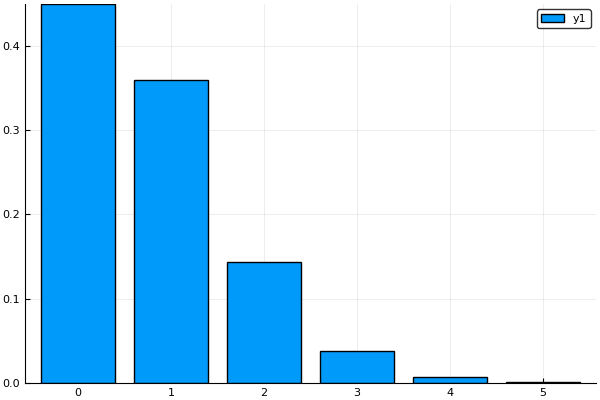

In [46]:
x, A = linspace(0, 5, 6), Poisson(0.8)
bar(x, pdf.(A, x))

10秒あたりの平均提出者数が0.8であったことから、$\lambda=0.8$のポアソン分布を考える。  
次の10秒間に誰も提出しない確率は0.449 (x=0)であり、3人以上提出する確率は0.047である。
（$\lambda$を変えたポアソン分布の図は省略）

母数$\lambda$のポアソン分布に従う確率事象が初めて観察されるまでの時間$X$は下記の確率密度関数に従う。

$$ f(x|\lambda) = \lambda e^{-\lambda x}, \ 0 \leq x,\ 0 < \lambda$$

これがポアソン事象の生起間隔の確率密度である。これを指数分布という。
また指数分布の期待値と分散は次の通り。

$$ E[X]=1/\lambda, V[X]=1/\lambda^2$$




## 母数の定義域が無限大を含む事前分布

### 波平釣果問題
波平さんは毎週末釣りにでかける。  
過去10回の釣果は1回あたり0匹、1匹、0匹、0匹、2匹、0匹、1匹、0匹、0匹、1匹だった。  
釣果がポアソン分布に従っているとすると釣れない可能性はどれほどか。  

## 予測分布
## 本書の立場
## 「３囚人問題」の正解は1/2でよい

---
## 章末問題